In [33]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import col, to_date, year
from pyspark.sql.functions import split, array_distinct, concat_ws

spark = SparkSession.builder \
    .appName("Patent") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0") \
    .getOrCreate()


In [34]:
spark

In [35]:
#read the data with the exact names of columns
#inferSchema to give each column the right type instead of string for all colums 
df = spark.read.format("com.mongodb.spark.sql.DefaultSource") \
    .option("database", "FPO_Patent")\
    .option("collection", "FPO_DATA")\
    .option("uri", "mongodb://127.0.0.1:27017/FPO_Patent.DATA") \
    .option('inferSchema','true')\
    .load()


In [36]:
#get the columns names 
df.columns

['Application Number',
 'Assignee',
 'Attorney',
 'Claims',
 'Country',
 'Field of Search',
 'Filing Date',
 'Inventors',
 'Patent Number',
 'Patent PDF',
 'Primary Examiner',
 'Publication Date',
 'Summary',
 'Title',
 '_id']

In [37]:
df.printSchema()

root
 |-- Application Number: string (nullable = true)
 |-- Assignee: string (nullable = true)
 |-- Attorney: string (nullable = true)
 |-- Claims: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Field of Search: string (nullable = true)
 |-- Filing Date: string (nullable = true)
 |-- Inventors: string (nullable = true)
 |-- Patent Number: long (nullable = true)
 |-- Patent PDF: string (nullable = true)
 |-- Primary Examiner: string (nullable = true)
 |-- Publication Date: string (nullable = true)
 |-- Summary: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)



In [38]:
#select all columns
df.show(5)

+------------------+--------------------+--------------------+--------------------+-------------+---------------+-----------+--------------------+-------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+
|Application Number|            Assignee|            Attorney|              Claims|      Country|Field of Search|Filing Date|           Inventors|Patent Number|          Patent PDF|    Primary Examiner|Publication Date|             Summary|               Title|                 _id|
+------------------+--------------------+--------------------+--------------------+-------------+---------------+-----------+--------------------+-------------+--------------------+--------------------+----------------+--------------------+--------------------+--------------------+
|         15/006773|Ample, Inc. (San ...|Intrinsic Law Cor...|What is claimed i...|United States|        320/126| 01/26/2016|['Shrinkle, Louis...|     

In [39]:
df.count()

950

In [8]:
# df.head(3)

In [40]:
#select one column 
df.select(['Title','Country']).show()


+--------------------+-------------+
|               Title|      Country|
+--------------------+-------------+
|Electric vehicle ...|United States|
|Electric vehicle ...|United States|
|Electric vehicle ...|United States|
|Battery charging ...|United States|
|Exchangeable batt...|United States|
|Refuelable batter...|United States|
|Exchangeable batt...|United States|
|Battery configura...|United States|
|Refuelable batter...|United States|
|Refuelable batter...|United States|
|USING BATTERY SYS...|United States|
|Systems and metho...|United States|
|Battery configura...|United States|
|Battery configura...|United States|
|Cold weather batt...|United States|
|Electrical vehicl...|United States|
|Rechargeable batt...|United States|
|Electric vehicle ...|United States|
|Hybrid and electr...|United States|
|PAYMENT SYSTEM AN...|United States|
+--------------------+-------------+
only showing top 20 rows



# Cleaning


In [44]:
import pandas as pd

data = pd.read_csv("C:\\Users\\ADMIN\Downloads\\projet\patent_data_FPO (1).csv")
data.head()

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12108\2806725029.py:3: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("C:\\Users\\ADMIN\Downloads\\projet\patent_data_FPO (1).csv")


,Patent Number,Title,Country,Inventors,Patent PDF,Application Number,Publication Date,Filing Date,Assignee,Field of Search,Primary Examiner,Attorney,Claims,Summary
0,9694707,Electric vehicle battery systems with exchange...,United States,"['Shrinkle, Louis J. ']",https://www.freepatentsonline.com/9694707.pdf,15/006773,07/04/2017,01/26/2016,"Ample, Inc. (San Francisco, CA, US)",320/126,"DIAO, M BAYE","Intrinsic Law Corp. (Woburn, MA, US)",What is claimed is:\n 1. An ele...,"Various implementations of systems, methods an..."
1,11529859,Electric vehicle battery management,United States,"['Sampson, Nicholas John ', 'Paryani, Anil ', ...",https://www.freepatentsonline.com/11529859.pdf,16/090567,12/20/2022,03/31/2017,"Faraday & Future Inc. (Gardena, CA, US)",NaN,"MASIH, KAREN","Knobbe, Martens, Olson & Bear, LLP (IRVINE, CA...",What is claimed is:\n 1. An ele...,FIG. 3 shows the schematic illustration FIG. 1...
2,10245964,Electric vehicle batteries and stations for ch...,United States,"['Penilla, Angel A. ', 'Penilla, Albert S. ']",https://www.freepatentsonline.com/10245964.pdf,16/150252,04/02/2019,10/02/2018,"Emerging Automotive, LLC (Los Altos, CA, US)",320/109,"FANTU, YALKEW","PENILLA IP, APC - PATENT LAW (Scotts Valley, C...",What is claimed is:\n 1. An ele...,It is in this context that embodiments of the ...
3,10442302,"Battery charging control methods, electrical v...",United States,"['Kintner-meyer, Michael ']",https://www.freepatentsonline.com/10442302.pdf,15/163925,10/15/2019,05/25/2016,"Battelle Memorial Institute (Richland, WA, US)",NaN,"CHEN, GEORGE YUNG CHIEH","Wells St. John P.S. (Spokane, WA, US)",The invention claimed is:\n 1. ...,FIG. 1 is a block diagram of a battery system ...
4,9925882,Exchangeable batteries for use by electric veh...,United States,"['Penilla, Angel A. ', 'Penilla, Albert S. ']",https://www.freepatentsonline.com/9925882.pdf,15/683286,03/27/2018,08/22/2017,"Emerging Automotive, LLC (Los Altos, CA, US)",320/109,"FANTU, YALKEW","PENILLA IP, APC - PATENT LAW (Scotts Valley, C...",What is claimed is:\n 1. An ele...,It is in this context that embodiments of the ...


In [13]:
data.isna().sum()

Patent Number           0
Title                   0
Country                 0
Inventors               0
Patent PDF              0
Application Number      0
Publication Date        0
Filing Date             0
Assignee               55
Field of Search       677
Primary Examiner        1
Attorney                1
Claims                  0
Summary                98
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
duplicate_rows_count = df.count() - df.distinct().count() 
print(duplicate_rows_count)


0


In [ ]:
data=data.to_csv("patent_data_FPO.csv", index=False)

# EDA


In [45]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

df.createOrReplaceTempView("patents")

### 1- Count the number of patents by country:

In [46]:
patent_counts_by_country = df.groupBy('Country').count()
patent_counts_by_country.show()


+-------------+-----+
|      Country|count|
+-------------+-----+
|United States|  950|
+-------------+-----+



In [47]:
patent_counts_by_country_sql = spark.sql("""
    SELECT Country, COUNT(*) AS Patent_Count
    FROM patents
    GROUP BY Country
    ORDER BY Patent_Count DESC
""")
patent_counts_by_country_sql.show()

+-------------+------------+
|      Country|Patent_Count|
+-------------+------------+
|United States|         950|
+-------------+------------+



### 2- Find the most common inventors:

#### *count the number of patents per inventor, treating each inventor individually.

In [52]:
from pyspark.sql.functions import regexp_extract, expr
from pyspark.sql.functions import split, explode, count


exploded_inventors = df.withColumn("Inventor", explode(split(df['Inventors'], ', ')))

patents_per_inventor = exploded_inventors.groupBy("Inventor").agg(count("Patent Number").alias("Number of Patents"))
patents_per_inventor.show()

+--------------+-----------------+
|      Inventor|Number of Patents|
+--------------+-----------------+
|    Ruichen ']|                2|
|       Umran '|                5|
|     'Hamilton|                2|
|       ['Zhang|                9|
|     'Souschek|                1|
|     Tatsuo ']|                1|
|  Basti Anil '|                1|
|       ['Olsen|                1|
|       Takao '|                1|
|     ['Vizzini|                1|
|        'Casci|                1|
|  Chen-sheng '|                1|
| Ross Martin '|                1|
| Tara Chand ']|                1|
| Christopher '|                2|
|     Deborah '|                1|
|        'Nanbu|                1|
|    ['Siddiqui|                1|
|['Genin-demure|                1|
|      'Fujioka|                2|
+--------------+-----------------+
only showing top 20 rows



In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

patents_per_inventor = spark.sql("""
    SELECT inventor, COUNT(*) AS num_patents
    FROM (
        SELECT explode(split(Inventors, ', ')) AS inventor
        FROM patents
    )
    GROUP BY inventor
    ORDER BY num_patents DESC
""")

# Show the result
patents_per_inventor.show()


+--------------------+-----------+
|            inventor|num_patents|
+--------------------+-----------+
|                'Liu|         38|
|                'Kim|         37|
|               'Wang|         33|
|               'Tang|         28|
|              Ying '|         26|
|               'Chen|         24|
|               'Park|         23|
|          Angel A. '|         21|
|           ['Penilla|         21|
|        Albert S. ']|         21|
|            'Penilla|         21|
|          ['Bertness|         21|
|            Yifan ']|         20|
|              ['Chen|         20|
|Scott Quinlan Fre...|         19|
|         Kevin I. ']|         17|
|                ['Wu|         16|
|      Kurt Russell '|         15|
|              ['Yang|         15|
|               'Choi|         15|
+--------------------+-----------+
only showing top 20 rows



#### *count the number of patents per inventor

In [55]:
patent_counts_by_inventory = df.groupBy('Inventors').count().orderBy('count', ascending=False)
patent_counts_by_inventory.show()


+--------------------+-----+
|           Inventors|count|
+--------------------+-----+
|['Penilla, Angel ...|   21|
|['Bertness, Kevin...|   17|
|['Capati, Nathali...|   11|
|   ['Sham, Wellen ']|    8|
|['Wu, Xingchi ', ...|    8|
|   ['Chen, Yi-tso ']|    8|
|['Yang, Yung-kang ']|    7|
|['Rocholl, Joshua...|    6|
|['Anglin, Howard ...|    6|
|['Grace, Dustin '...|    6|
|['Kelty, Kurt Rus...|    6|
|['Scheucher, Karl...|    6|
|['Stewart, Sarah ...|    5|
|   ['Wu, Yi-tsung ']|    5|
|['Chaney, George ...|    5|
|['Droste, Peter C...|    5|
| ['Moon, Jongseok ']|    5|
|['Tang, Yifan ', ...|    4|
|['Seo, Dong-seob ...|    4|
|['Richter, Jan ',...|    4|
+--------------------+-----+
only showing top 20 rows



### 3- Get the number of patents published each year:

In [50]:
from pyspark.sql.functions import year

df_year = df.withColumn('Publication_Year', year(to_date(df['Publication Date'], 'MM/dd/yyyy')))
patents_per_year = df_year.groupBy('Publication_Year').count().orderBy('Publication_Year',ascending=False)
patents_per_year.show()

+----------------+-----+
|Publication_Year|count|
+----------------+-----+
|            2024|   44|
|            2023|   96|
|            2022|  105|
|            2021|   68|
|            2020|   78|
|            2019|   69|
|            2018|   48|
|            2017|   56|
|            2016|   48|
|            2015|   57|
|            2014|   46|
|            2013|   47|
|            2012|   45|
|            2011|   16|
|            2010|   20|
|            2009|   11|
|            2008|   10|
|            2007|    5|
|            2006|    5|
|            2005|    6|
+----------------+-----+
only showing top 20 rows



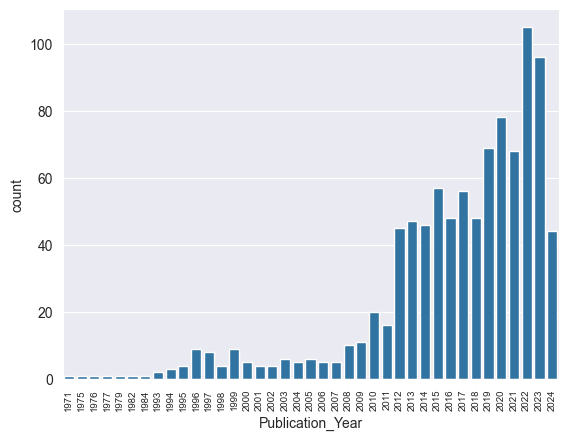

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to Pandas DataFrame
patents_year_df = patents_per_year.toPandas().sort_values(by='Publication_Year', ascending=True)
sns.barplot(x='Publication_Year', y='count', data=patents_year_df)
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
plt.show()


### 4- Find the top assignees (companies) with the most patents:


In [43]:
assignee_counts = df.groupBy('Assignee').count().orderBy('count', ascending=False)
assignee_counts.show()

+--------------------+-----+
|            Assignee|count|
+--------------------+-----+
|                NULL|   55|
|SF Motors, Inc. (...|   48|
|Ford Global Techn...|   26|
|FORD GLOBAL TECHN...|   20|
|Midtronics, Inc. ...|   17|
|HONDA MOTOR CO., ...|   14|
|Honda Motor Co., ...|   11|
|Rivian IP Holding...|   11|
|Honda Giken Kogyo...|   10|
|Mitsubishi Jidosh...|    9|
|GM GLOBAL TECHNOL...|    9|
|Emerging Automoti...|    9|
|International Bus...|    9|
|Nikola Corporatio...|    8|
|SUBARU CORPORATIO...|    8|
|Tesla Motors, Inc...|    8|
|PENILLA ANGEL A. ...|    7|
|TESLA MOTORS, INC...|    7|
|GM Global Technol...|    7|
|Lightening Energy...|    7|
+--------------------+-----+
only showing top 20 rows



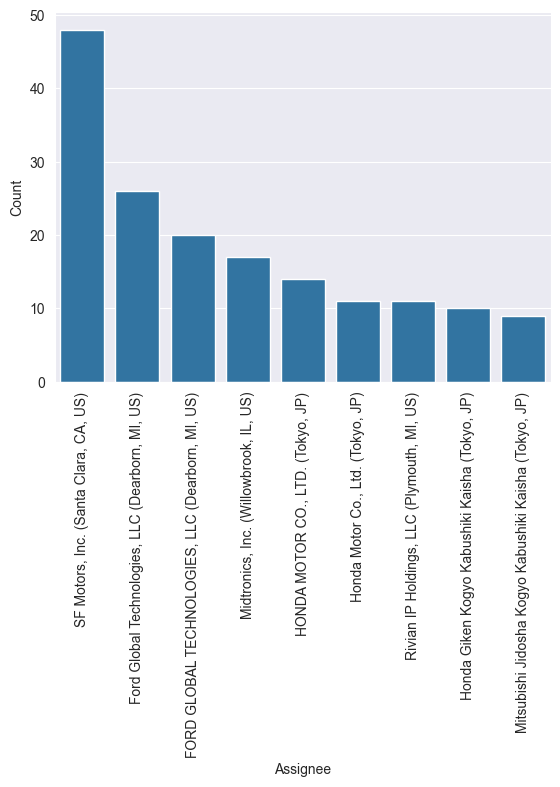

In [56]:
patents_assignees_df=assignee_counts.toPandas()
patents_assignees_df = patents_assignees_df.sort_values(by='count', ascending=False)
# Keep only the top 10 assignees
patents_assignees_top10 = patents_assignees_df.head(10)
sns.barplot(x='Assignee', y='count', data=patents_assignees_top10)
plt.xlabel('Assignee')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

### 5- Find patents with specific keywords in the title

In [56]:
specific_keywords_title = spark.sql("""
    SELECT *
    FROM patents
    WHERE LOWER(Title) LIKE '%electric vehicle battery%'
""")

specific_keywords_title.show()


+------------------+--------------------+--------------------+--------------------+-------------+--------------------+-----------+--------------------+-------------+--------------------+-------------------+----------------+--------------------+--------------------+--------------------+
|Application Number|            Assignee|            Attorney|              Claims|      Country|     Field of Search|Filing Date|           Inventors|Patent Number|          Patent PDF|   Primary Examiner|Publication Date|             Summary|               Title|                 _id|
+------------------+--------------------+--------------------+--------------------+-------------+--------------------+-----------+--------------------+-------------+--------------------+-------------------+----------------+--------------------+--------------------+--------------------+
|         15/006773|Ample, Inc. (San ...|Intrinsic Law Cor...|What is claimed i...|United States|             320/126| 01/26/2016|['Shrinkl

### 6-visualize the number of patents with "Electric Vehicle Battery" in the title by year

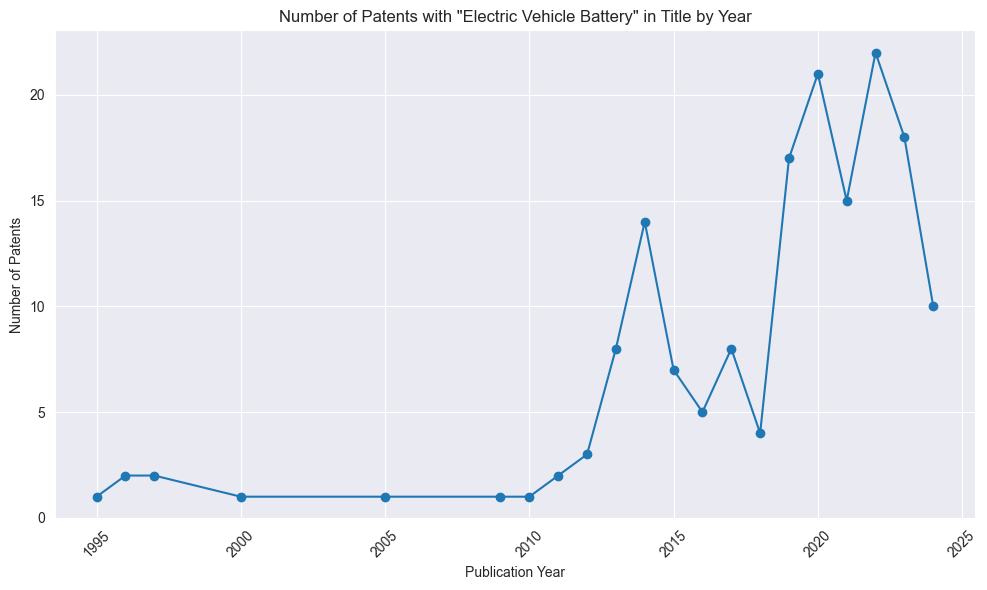

In [74]:
specific_keywords_title = spark.sql("""
    SELECT YEAR(to_date(`Publication Date`, 'MM/dd/yyyy')) AS Publication_Year, COUNT(*) AS Patent_Count
    FROM patents
    WHERE LOWER(Title) LIKE '%electric vehicle battery%'
    GROUP BY Publication_Year
    ORDER BY Publication_Year
""")

specific_keywords_title_df = specific_keywords_title.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(specific_keywords_title_df['Publication_Year'], specific_keywords_title_df['Patent_Count'], marker='o')
plt.xlabel('Publication Year')
plt.ylabel('Number of Patents')
plt.title('Number of Patents with "Electric Vehicle Battery" in Title by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 7-The most common keywords/terms used in the title of patents

In [133]:
from pyspark.sql.functions import split, explode, lower, regexp_replace, col, collect_list
from pyspark.ml.feature import StopWordsRemover
import warnings
warnings.filterwarnings("ignore")

df_keywords = df.withColumn("Title", lower(col("Title"))) \
                .withColumn("Title", regexp_replace(col("Title"), "[^a-zA-Z\s]", "")) \
                .withColumn("TitleWords", split(col("Title"), " "))
df_keywords = df_keywords.withColumn("Keyword", explode(col("TitleWords")))

# Group by some unique identifier (e.g., Patent Number) and collect the words into arrays
df_grouped = df_keywords.groupBy("Patent Number").agg(collect_list("Keyword").alias("Keywords"))

# Remove stop words
remover = StopWordsRemover(inputCol="Keywords", outputCol="CleanKeywords")
df_cleaned = remover.transform(df_grouped).select("CleanKeywords")
df_cleaned = df_cleaned.withColumn("CleanKeyword", explode(col("CleanKeywords")))
keyword_counts = df_cleaned.groupBy("CleanKeyword").count()

top_keywords = keyword_counts.orderBy(keyword_counts["count"].desc()).limit(20)
top_keywords.show()




+------------+-----+
|CleanKeyword|count|
+------------+-----+
|    electric|  934|
|     battery|  916|
|     vehicle|  862|
|      system|  313|
|    vehicles|  205|
|      method|  183|
|    charging|  153|
|        pack|  130|
|   batteries|  101|
|  electrical|   67|
|      device|   66|
|      hybrid|   63|
|       power|   60|
|     control|   59|
|     systems|   57|
|     methods|   56|
|   structure|   53|
|   apparatus|   47|
|  management|   47|
|       motor|   46|
+------------+-----+



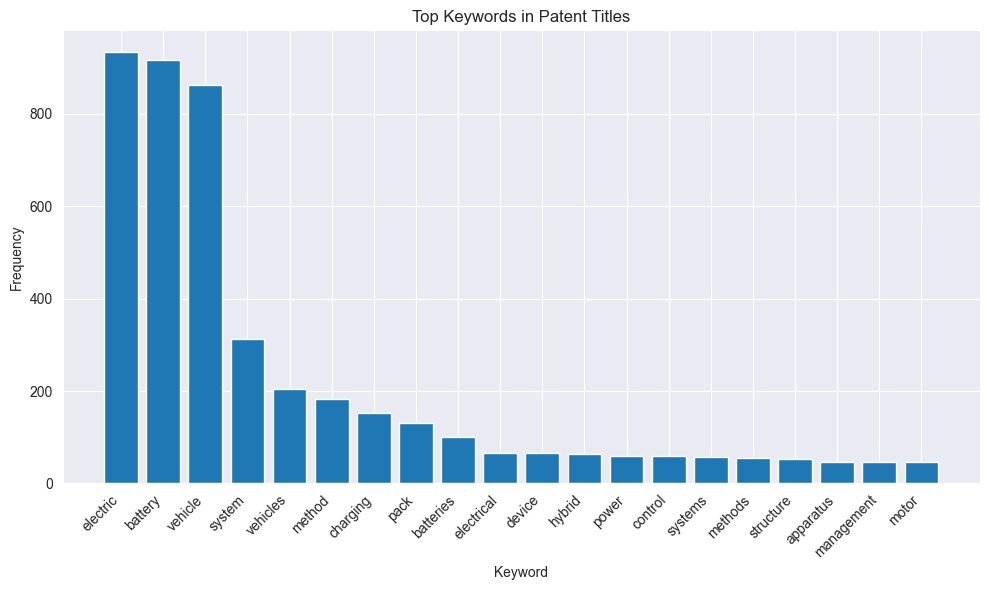

In [134]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas DataFrame for easier plotting
top_keywords_df = top_keywords.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_keywords_df['CleanKeyword'], top_keywords_df['count'])
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Top Keywords in Patent Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 7-The most common keywords/terms used in the summary of patents


In [135]:
from pyspark.sql.functions import split, explode, lower, regexp_replace, col, collect_list
from pyspark.ml.feature import StopWordsRemover

# Convert the summary column to lowercase and tokenize it into individual words
df_summary_keywords = df.withColumn("Summary", lower(col("Summary"))) \
                        .withColumn("Summary", regexp_replace(col("Summary"), "[^a-zA-Z\s]", "")) \
                        .withColumn("SummaryWords", split(col("Summary"), " "))
df_summary_keywords = df_summary_keywords.withColumn("Keyword", explode(col("SummaryWords")))
df_grouped_summary = df_summary_keywords.groupBy("Patent Number").agg(collect_list("Keyword").alias("SummaryKeywords"))
remover_summary = StopWordsRemover(inputCol="SummaryKeywords", outputCol="CleanSummaryKeywords")
df_cleaned_summary = remover_summary.transform(df_grouped_summary).select("CleanSummaryKeywords")
df_cleaned_summary = df_cleaned_summary.withColumn("CleanSummaryKeyword", explode(col("CleanSummaryKeywords")))
keyword_counts_summary = df_cleaned_summary.groupBy("CleanSummaryKeyword").count()
top_keywords_summary = keyword_counts_summary.orderBy(keyword_counts_summary["count"].desc()).limit(20)
top_keywords_summary.show()


+-------------------+-----+
|CleanSummaryKeyword|count|
+-------------------+-----+
|            battery|10635|
|            vehicle| 5597|
|           electric| 4436|
|              first| 2247|
|              power| 1847|
|             system| 1769|
|                may| 1749|
|               pack| 1682|
|             second| 1674|
|           charging| 1631|
|                one| 1444|
|            present|  987|
|          plurality|  977|
|            include|  883|
|          invention|  865|
|             method|  857|
|             module|  843|
|             charge|  841|
|         electrical|  832|
|         configured|  828|
+-------------------+-----+



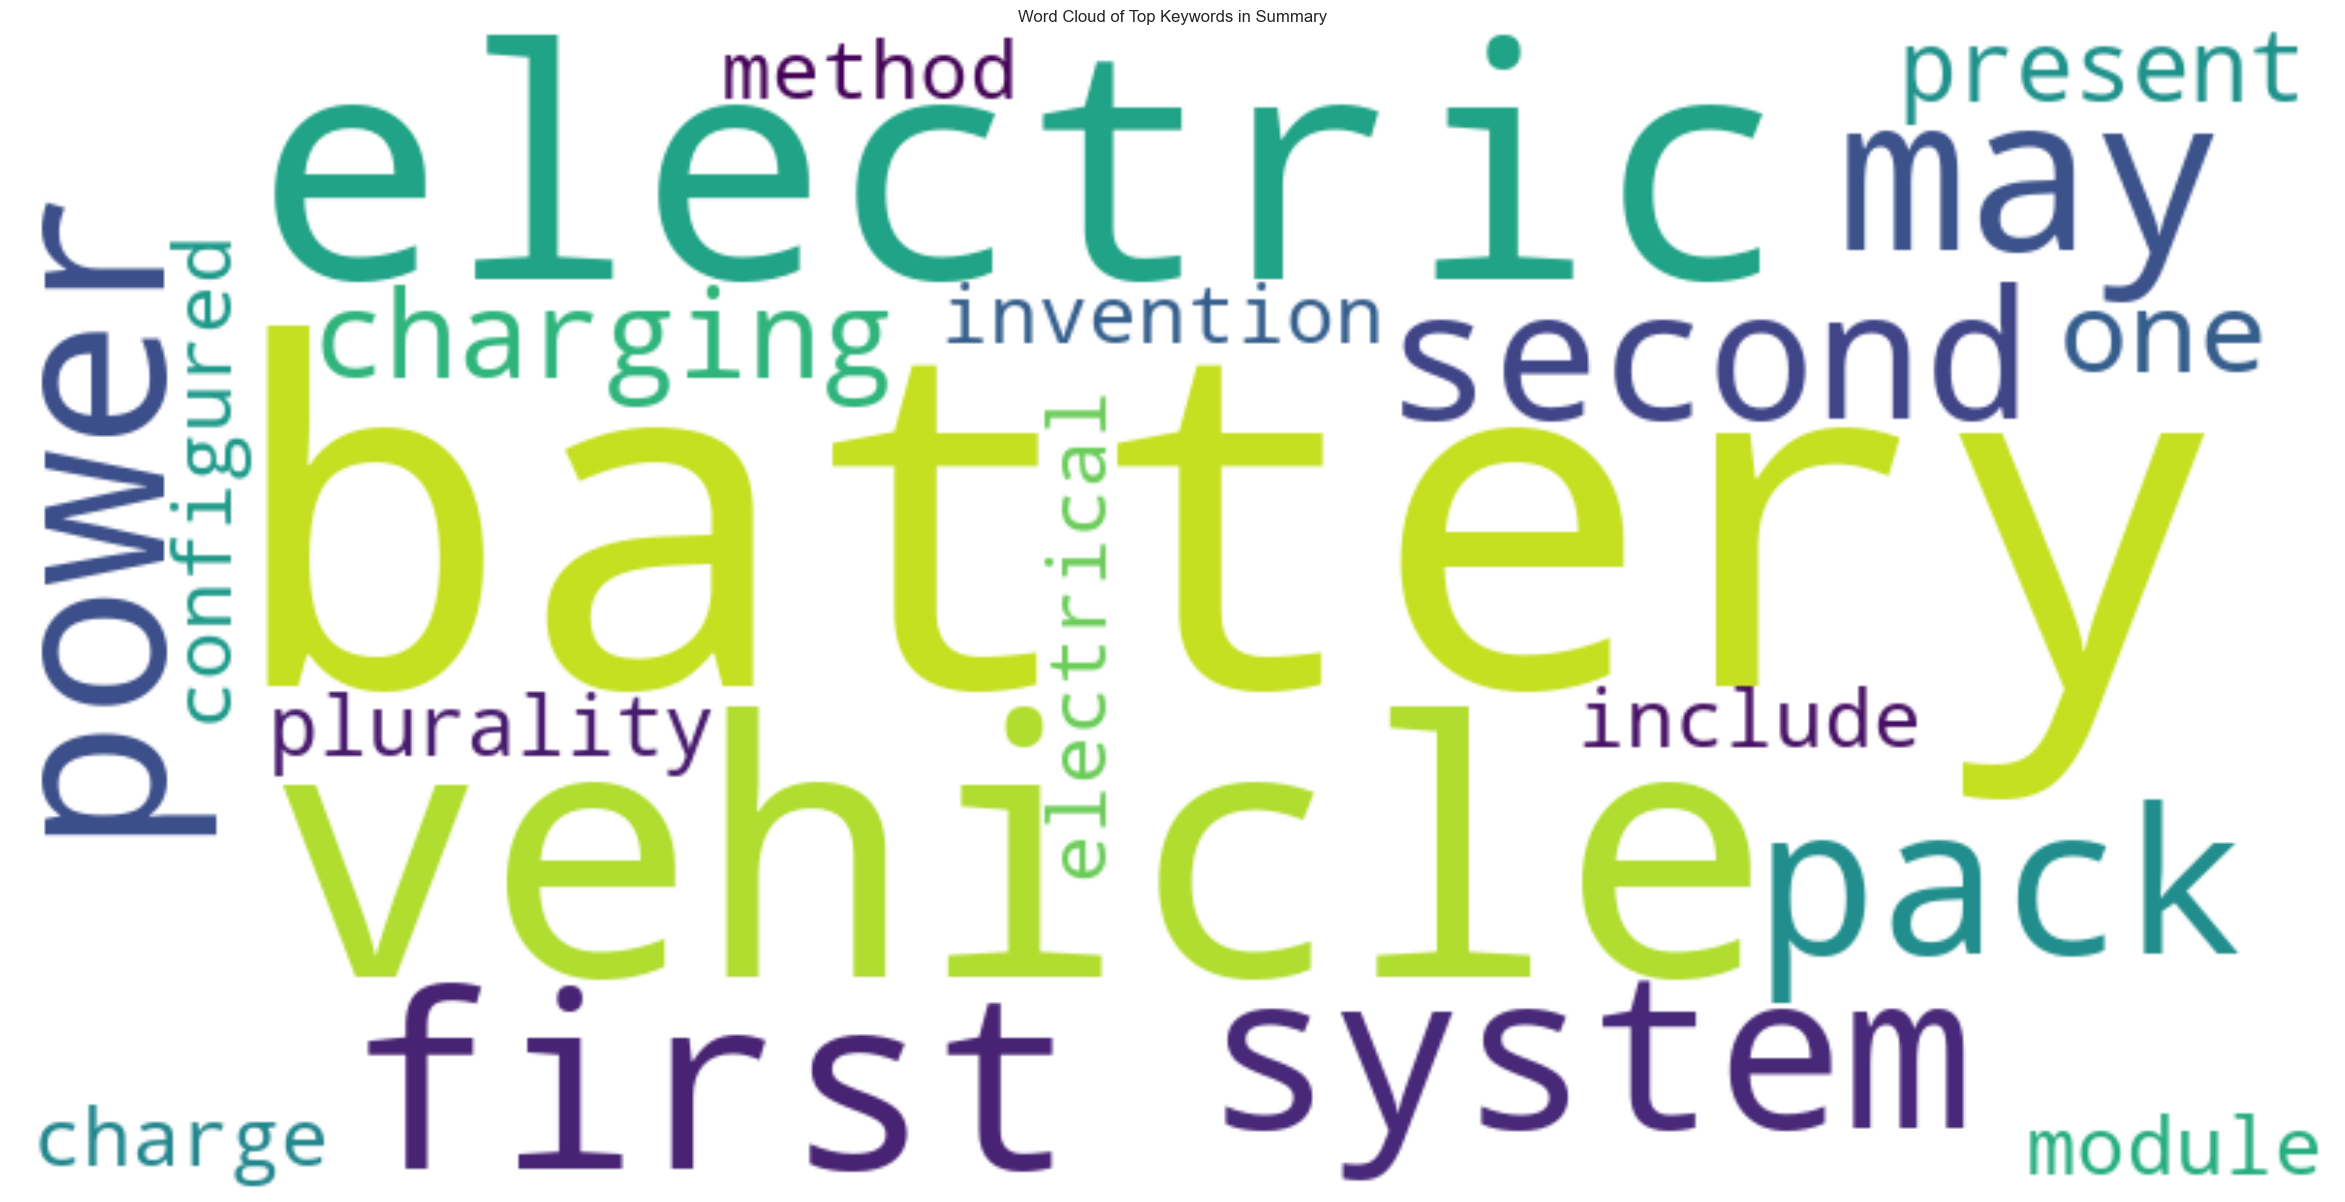

In [154]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
from wordcloud import WordCloud

top_keywords_summary_df = top_keywords_summary.toPandas()

word_freq_dict = dict(zip(top_keywords_summary_df['CleanSummaryKeyword'], top_keywords_summary_df['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Keywords in Summary')
plt.show()
